![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [2]:
# Data preprocessing
penguins_df['sex'] = pd.get_dummies(penguins_df['sex'], drop_first=True) # MALE 1 / FEMALE 0
scaler = StandardScaler()
normalized_pg = scaler.fit_transform(penguins_df)
normalized_pg_df = pd.DataFrame(normalized_pg, columns = penguins_df.columns)
print(normalized_pg_df.apply([np.mean, np.std])) # mean 0 / std 1
normalized_pg_df.head()

      culmen_length_mm  culmen_depth_mm  flipper_length_mm   body_mass_g  \
mean     -4.708416e-16     1.284113e-16       7.276642e-16  4.280378e-17   
std       1.000000e+00     1.000000e+00       1.000000e+00  1.000000e+00   

               sex  
mean -1.391123e-16  
std   1.000000e+00  


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


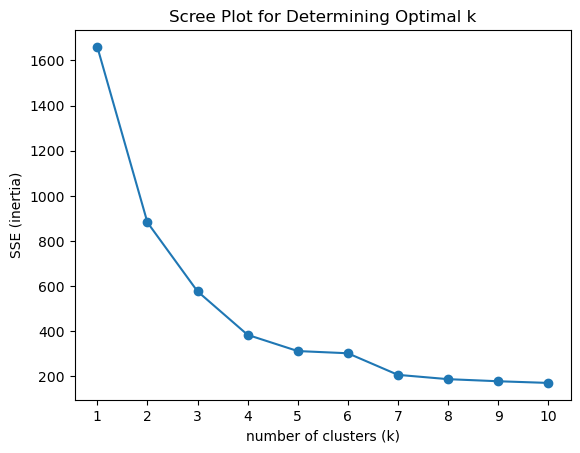

In [3]:
# Detect num of clusters
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(normalized_pg_df)
    sse.append(kmeans.inertia_)  # inertia_ is SSE

# Scree plot
plt.plot(k_values, sse, '-o')
plt.xlabel('number of clusters (k)')
plt.ylabel('SSE (inertia)')
plt.xticks(k_values)
plt.title('Scree Plot for Determining Optimal k')
plt.show()

In [4]:
# Modeling
k = 4
model = KMeans(n_clusters = k, random_state = 42)
model.fit(normalized_pg_df)
numeric_columns = penguins_df.drop('sex', axis = 1)
numeric_columns['label'] = model.labels_
stat_penguins = numeric_columns.groupby('label').mean()